Importation de la bibliothèque créée spécifiquement pour fit un profil DLVO :

In [1]:
from DLVOlib.params import DLVO_parameters

/opt/anaconda3/envs/dlvo/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3>Réglages du code</h3>

La seule donnée obligatoire est le chemin vers le fichier de données (<span style="font-family:menlo">datafile</span>).

Il est possible de spécifier une erreur particulière pour la mesure des forces via <span style="font-family:menlo">force_err</span> (en pN). La valeur par défaut est 0.5 pN.

Le réglage <span style="font-family:menlo">cutoff</span> permet d'occulter les données en-dessous d'une certaine échelle (en nm). La valeur par défaut est 0, donc tout est pris en compte.

Par défaut, si un profil a déjà été fit sur un fichier de données, il est sauvegardé et réutilisé. Pour le fit à nouveau, il faut entrer <span style="font-family:menlo">rerun=True</span> .

In [ ]:
datafile = 'data/127_B_3,12um_0mgg_27-03-25_moyenne_force_distance.txt'
force_err = 0.5
cutoff = 0
rerun = True

Calcul des paramètres et tracé des figures pour analyser les résultats :

<xarray.Dataset> Size: 24B
Dimensions:   ()
Data variables:
    $\alpha$  float64 8B 1.003
    $\beta$   float64 8B 1.003
    $k$       float64 8B 1.003
----------------------
alpha = 7.18 + 0.23 - 0.23 
beta = 78 + 35 - 35 
k = 0.00362 + 0.00005 - 0.00005 
----------------------



<Figure size 720x480 with 0 Axes>

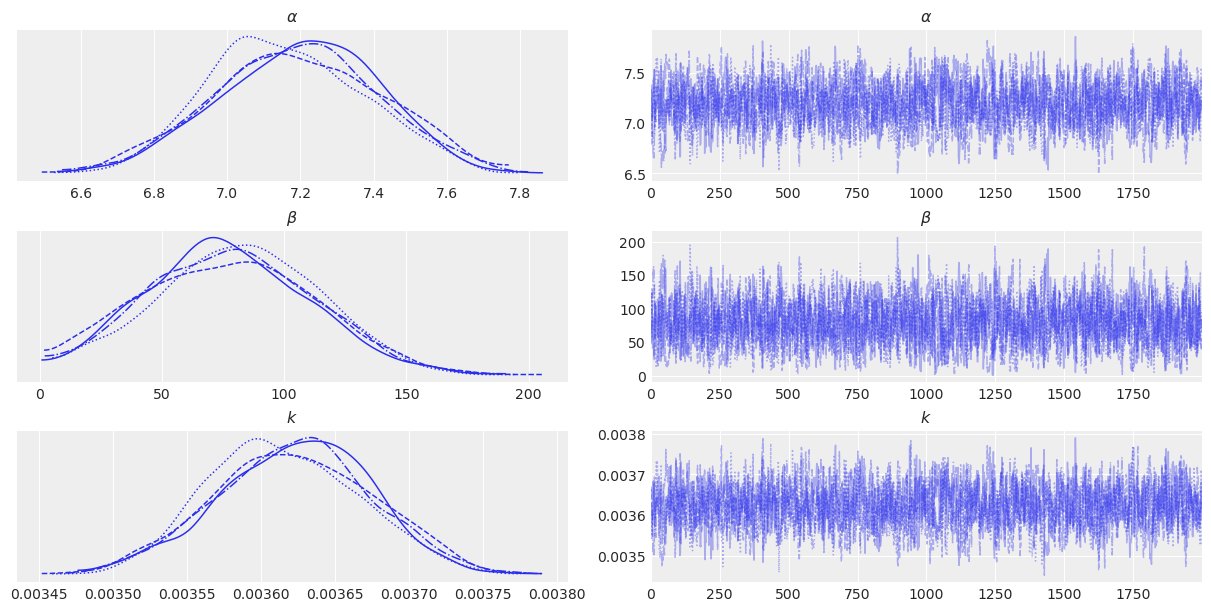

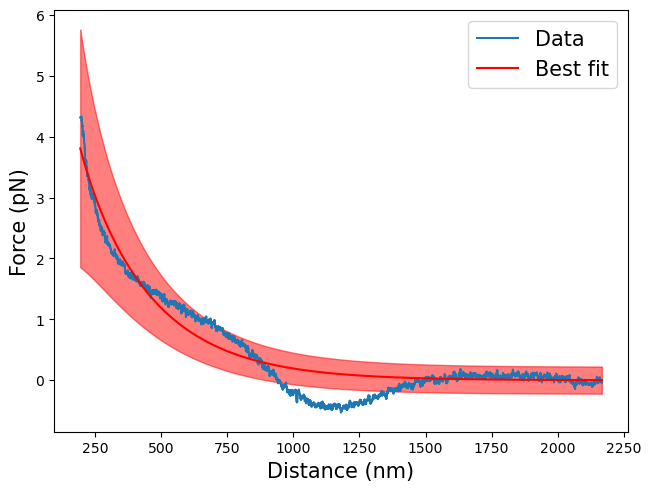

<Figure size 640x480 with 0 Axes>

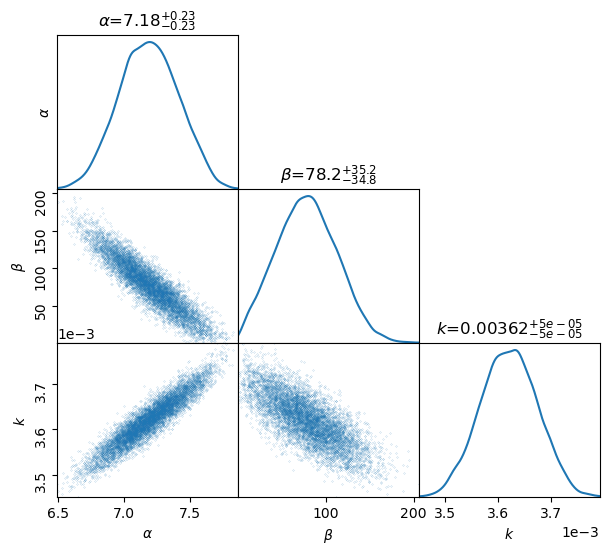

In [ ]:
params = DLVO_parameters(datafile,cutoff=cutoff,force_err=force_err,rerun=rerun)
params.get_parameters()
params.cornerplot()
params.compare_model()

<span style="font-family:courier">datafile_chains.pdf</span> montre les distributions de probabilité pour chaque paramètre (à gauche, une par chaîne) ainsi que les chaînes ayant servi à les échantillonner (droite). Visuellement, si on reconnaît des gaussiennes à gauche et un brouillon à droite, c'est que l'algorithme a convergé. On peut caractériser plus rigoureusement la convergence via les valeurs rhat, qui sont affichées ci-dessus pour chaque paramètre à fit : elles doivent valoir 1 à environ 0.01 près. Il s'agit surtout d'un graphe permettant de détecter des défauts dans l'algorithme.

Les résultats sont plus propres à visualiser sur la figure <span style="font-family:courier">datafile_cornerplot.pdf</span>, nommée couramment cornerplot. Il s'agit d'une matrice de figures dont chaque entrée correspond à un paramètre. Sur la diagonale, on peut voir les distributions résultant de l'échantillonnage (idéalement des gaussiennes) et leurs estimations. Les autres figures représentent la densité de probabilité pour les distributions 2D de chaque couple possible de paramètres, ce qui permet d'étudier d'éventuelles dégénérescences. Les entrées étant symétriques, on ne représente que la partie triangulaire basse de la matrice de figures.

<span style="font-family:courier">datafile_compare_model.pdf</span> trace le modèle superposé aux données, avec des barres d'erreur tirées des distributions de probabilité visualisables sur <span style="font-family:courier">datafile_chains.pdf</span>.